In [1]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
num_bins = 10

In [2]:
bankdata = pd.read_csv('bank-full.csv')

In [3]:
bankdata.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bankdata.shape

(45211, 17)

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bankdata.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [7]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
bankdata.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

duration, campaign, pdays and previous has the outliers we can scale it but no reason to scale it the data doesnt look out of place. Every data has some meaning. 
Day is pretty evenly spread we can plan to delete the day field. 

In [9]:
bankdata.drop(['day'],axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,may,55,1,-1,0,unknown,no


In [10]:
bankdata.groupby("Target").agg({'Target': 'count'})

,Target
Target,
no,39922
yes,5289


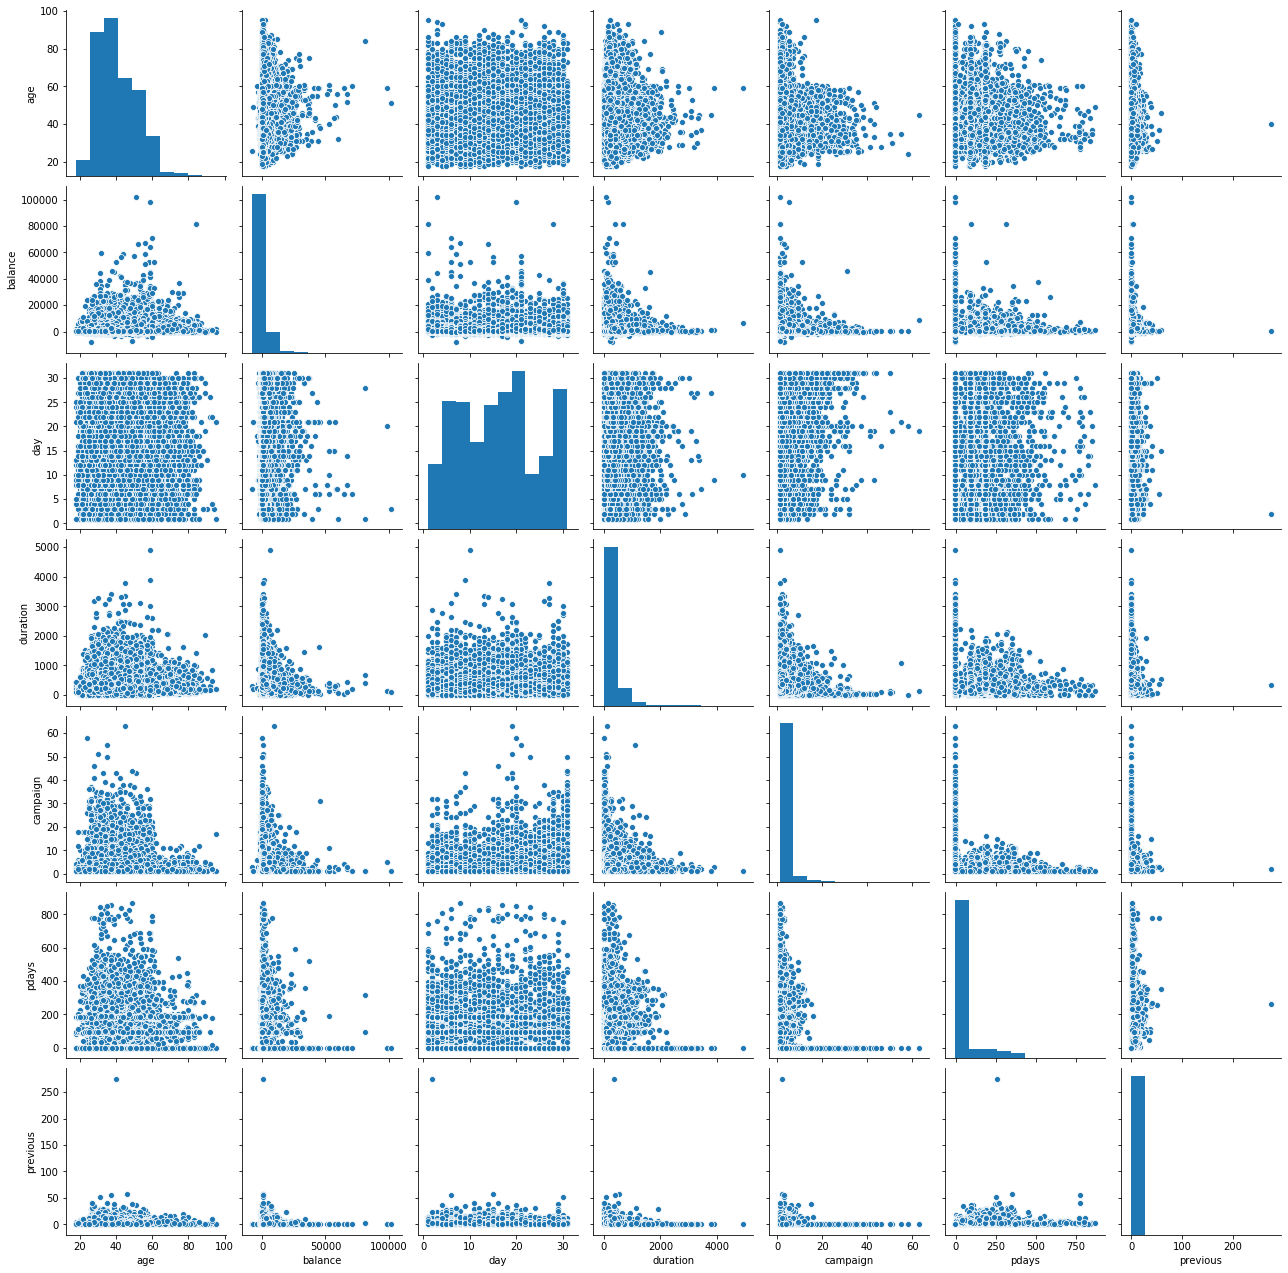

In [11]:
sns.pairplot(bankdata);

In [12]:
for feature in bankdata.columns: # Loop through all columns in the dataframe
    if bankdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankdata[feature] = pd.Categorical(bankdata[feature])# Replace strings with an integer
bankdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [13]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [14]:
replaceStruct = {
                "Target":     {"yes": 1, "no": 0 }
                }

In [15]:
bankdata=bankdata.replace(replaceStruct)
bankdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


In [16]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null int64
dtypes: category(9), int64(8)
memory usage: 3.1 MB


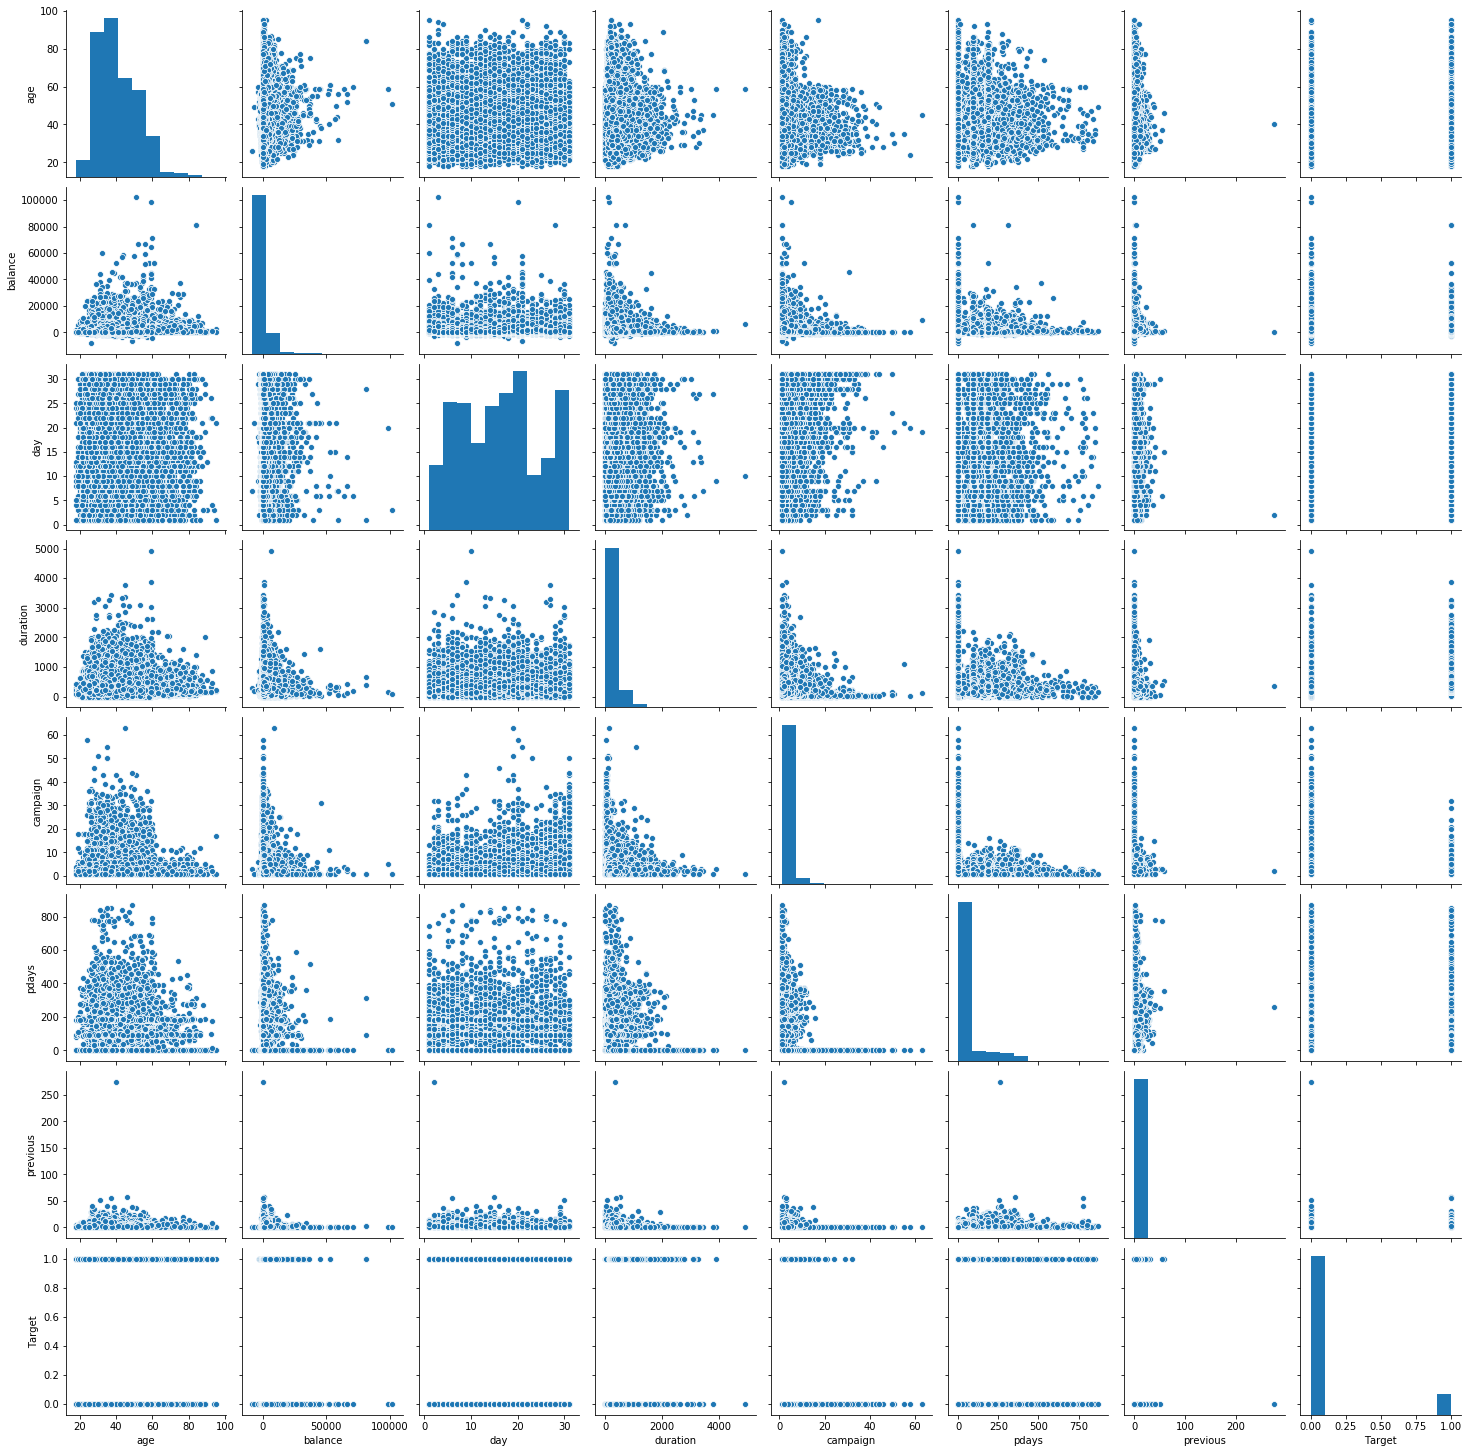

In [17]:
sns.pairplot(bankdata);

In [18]:
bankdata.corr()

,age,balance,day,duration,campaign,pdays,previous,Target
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Target,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


1. Based on the above data it seems duration is very closely related to Target.
2. There is no strong correlation between any other column and Target

Deliverable 2

In [19]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null int64
dtypes: category(9), int64(8)
memory usage: 3.1 MB


In [20]:
print(bankdata.job.value_counts())
print(bankdata.marital.value_counts())
print(bankdata.education.value_counts())
print(bankdata.default.value_counts())
print(bankdata.housing.value_counts())
print(bankdata.loan.value_counts())
print(bankdata.contact.value_counts())
print(bankdata.month.value_counts())
print(bankdata.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [21]:
replaceStruct1 = {
                "job":     { "blue-collar":1,"management":2,"technician":3,"admin.":4,"services":5,"retired":6,
                            "self-employed":7,"entrepreneur":8,"unemployed":9,"housemaid":10,"student":11,"unknown":0},
                "month": {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                "marital":{"married":2,"single":1,"divorced":0},
                "contact":{"cellular":2,"unknown":0,"telephone":1},
                "poutcome":{"unknown":0,"other":1,"failure":2,"success":3},
                "education":{"unknown":0,"primary":1,"secondary":2,"tertiary":3}
                }

oneHotCols=["default","housing","loan"] #This is just blowing up the columns can

In [22]:
bankdata=bankdata.replace(replaceStruct1)
bankdata=pd.get_dummies(bankdata, columns=oneHotCols)
bankdata.head(10)


,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2,2,3,2143,0,5,5,261,1,-1,0,0,0,1,0,0,1,1,0
1,44,3,1,2,29,0,5,5,151,1,-1,0,0,0,1,0,0,1,1,0
2,33,8,2,2,2,0,5,5,76,1,-1,0,0,0,1,0,0,1,0,1
3,47,1,2,0,1506,0,5,5,92,1,-1,0,0,0,1,0,0,1,1,0
4,33,0,1,0,1,0,5,5,198,1,-1,0,0,0,1,0,1,0,1,0
5,35,2,2,3,231,0,5,5,139,1,-1,0,0,0,1,0,0,1,1,0
6,28,2,1,3,447,0,5,5,217,1,-1,0,0,0,1,0,0,1,0,1
7,42,8,0,3,2,0,5,5,380,1,-1,0,0,0,0,1,0,1,1,0
8,58,6,2,1,121,0,5,5,50,1,-1,0,0,0,1,0,0,1,1,0
9,43,3,1,2,593,0,5,5,55,1,-1,0,0,0,1,0,0,1,1,0


In [23]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
age            45211 non-null int64
job            45211 non-null int64
marital        45211 non-null int64
education      45211 non-null int64
balance        45211 non-null int64
contact        45211 non-null int64
day            45211 non-null int64
month          45211 non-null int64
duration       45211 non-null int64
campaign       45211 non-null int64
pdays          45211 non-null int64
previous       45211 non-null int64
poutcome       45211 non-null int64
Target         45211 non-null int64
default_no     45211 non-null uint8
default_yes    45211 non-null uint8
housing_no     45211 non-null uint8
housing_yes    45211 non-null uint8
loan_no        45211 non-null uint8
loan_yes       45211 non-null uint8
dtypes: int64(14), uint8(6)
memory usage: 5.1 MB


In [24]:
#Lets Scale balance and duration 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#bankdata['balance'] = scaler.fit_transform(bankdata['balance'].values.reshape(-1,1))
#bankdata['duration'] = scaler.fit_transform(bankdata['duration'].values.reshape(-1,1))

In [25]:
bankdata.corr()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
age,1.000000,0.061056,0.126351,-0.173615,0.097783,-0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.014363,0.025155,0.017879,-0.017879,0.185513,-0.185513,0.015655,-0.015655
job,0.061056,1.000000,-0.058242,-0.028959,0.016976,0.047408,-0.007045,0.013143,0.006871,-0.031288,-0.015517,0.000841,0.020160,0.060468,0.000897,-0.000897,0.152714,-0.152714,0.024524,-0.024524
marital,0.126351,-0.058242,1.000000,-0.091853,0.028172,-0.017638,0.005217,0.044321,-0.018834,0.029294,-0.020832,-0.006876,-0.013149,-0.043846,0.018404,-0.018404,-0.011671,0.011671,-0.018526,0.018526
education,-0.173615,-0.028959,-0.091853,1.000000,0.050572,0.151481,0.021661,0.067935,0.002554,0.000194,0.007092,0.025295,0.041036,0.051341,0.009035,-0.009035,0.038689,-0.038689,-0.004307,0.004307
balance,0.097783,0.016976,0.028172,0.050572,1.000000,0.027273,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.034865,0.052838,0.066745,-0.066745,0.068768,-0.068768,0.084350,-0.084350
contact,-0.026221,0.047408,-0.017638,0.151481,0.027273,1.000000,0.027936,0.173779,0.020839,-0.019614,0.244816,0.147811,0.272710,0.148395,0.015404,-0.015404,0.188123,-0.188123,-0.010873,0.010873
day,-0.009120,-0.007045,0.005217,0.021661,0.004503,0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.081519,-0.028348,-0.009424,0.009424,0.027982,-0.027982,-0.011370,0.011370
month,0.092903,0.013143,0.044321,0.067935,0.094605,0.173779,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600,-0.036046,0.018717,-0.014989,0.014989,0.173887,-0.173887,-0.021638,0.021638
duration,-0.004648,0.006871,-0.018834,0.002554,0.021560,0.020839,-0.030206,-0.011866,1.000000,-0.084570,-0.001565,0.001203,0.013304,0.394521,0.010021,-0.010021,-0.005075,0.005075,0.012412,-0.012412
campaign,0.004760,-0.031288,0.029294,0.000194,-0.014578,-0.019614,0.162490,0.054868,-0.084570,1.000000,-0.088628,-0.032855,-0.111592,-0.073172,-0.016822,0.016822,0.023599,-0.023599,-0.009980,0.009980


In [26]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
age            45211 non-null int64
job            45211 non-null int64
marital        45211 non-null int64
education      45211 non-null int64
balance        45211 non-null int64
contact        45211 non-null int64
day            45211 non-null int64
month          45211 non-null int64
duration       45211 non-null int64
campaign       45211 non-null int64
pdays          45211 non-null int64
previous       45211 non-null int64
poutcome       45211 non-null int64
Target         45211 non-null int64
default_no     45211 non-null uint8
default_yes    45211 non-null uint8
housing_no     45211 non-null uint8
housing_yes    45211 non-null uint8
loan_no        45211 non-null uint8
loan_yes       45211 non-null uint8
dtypes: int64(14), uint8(6)
memory usage: 5.1 MB


In [27]:
#training set 70 to 30
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
X = bankdata.drop("Target" , axis=1)
y = bankdata.pop("Target")

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(X_train, y_train) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict = model.predict(X_test)

In [32]:
print("Training accuracy",model.score(X_train,y_train))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(X_test,y_test))   # this will give testing accuracy as testing data has been used

Training accuracy 0.8890258160331153

Testing accuracy 0.8906664700678266


In [33]:
#Performance of the model is better in testing

In [34]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [35]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

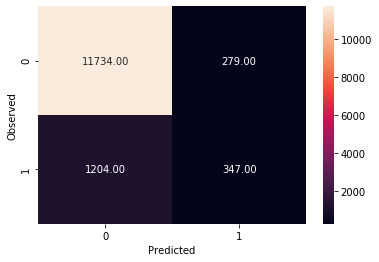

In [36]:
draw_cm(y_test,y_predict)

In [37]:
recall_score(y_test,y_predict)

0.22372662798194712

In [38]:
precision_score(y_test,y_predict)

0.5543130990415336

In [39]:
f1_score(y_test,y_predict)

0.3187873220027561

In [40]:
roc_auc_score(y_test,y_predict)

0.6002508941125085

In [41]:
# Checking Parameters of logistic regression
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.898, 0.889, 0.898, 0.882, 0.882]

[0.898, 0.891, 0.898, 0.886, 0.885]


In [43]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']  # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', solver=i)  # changed value of penaly to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.898, 0.882]

[0.898, 0.885]


In [44]:
#liblinear & saga are the same for liblinear and saga for 11 and 12 
#lets use liblinear 

In [45]:
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))  

Training accuracy 0.8193193667646222

Testing accuracy 0.8176054261279858


In [46]:
#using class_weight decreases the accuracy

In [47]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.897, 0.898, 0.898, 0.898, 0.898, 0.898]

[0.896, 0.898, 0.898, 0.898, 0.898, 0.898]


In [48]:
#same results for 0.1, 0.25, 0.5, 0.75, 1


Trainig accuracy 0.8976522261193794

Testing accuracy 0.8982601002654085

Confusion Matrix


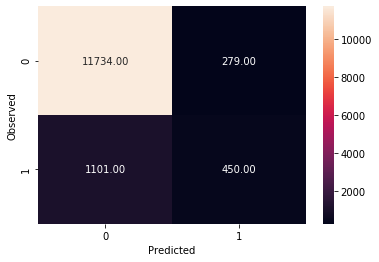

None

Recall: 0.2901353965183752

Precision: 0.6172839506172839

F1 Score: 0.39473684210526316

Roc Auc Score: 0.6334552783807226


In [49]:
#Therefore final model is
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear') 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train, y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Decision Tree Analyzer

In [50]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [51]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8735623709820112


In [52]:
print(dTree.get_depth())

28


0.8735623709820112


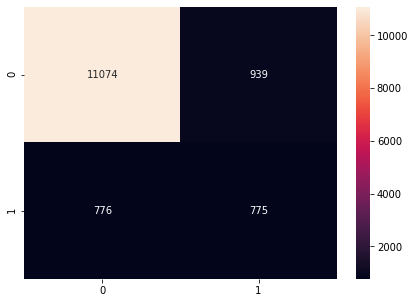

In [53]:
from sklearn import metrics
print(dTree.score(X_test , y_test))
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [54]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                  Imp
age          0.105144
job          0.037785
marital      0.019120
education    0.025709
balance      0.112372
contact      0.019625
day          0.101392
month        0.074773
duration     0.286483
campaign     0.038093
pdays        0.043868
previous     0.010798
poutcome     0.092304
default_no   0.000787
default_yes  0.001733
housing_no   0.005871
housing_yes  0.014191
loan_no      0.006250
loan_yes     0.003702


In [55]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.896711884399882

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'gini', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.8980389265703332

In [57]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 30)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl.score(X_test , y_test)

0.8975228546151578

In [58]:
from sklearn.ensemble import BaggingClassifier
bcl = BaggingClassifier( n_estimators= 20, max_samples=0.8)
bcl = bcl.fit(X_train, y_train)

test_pred = bcl.predict(X_test)
bcl.score(X_test , y_test)

0.9024624004718372

In [59]:
bcl = BaggingClassifier( n_estimators= 70, max_samples=0.5)
bcl = bcl.fit(X_train, y_train)

test_pred = bcl.predict(X_test)
bcl.score(X_test , y_test)

0.9049690356826895

In [60]:
bcl = BaggingClassifier( n_estimators= 100, max_samples=0.6)
bcl = bcl.fit(X_train, y_train)

test_pred = bcl.predict(X_test)
bcl.score(X_test , y_test)

0.906664700678266

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier( n_estimators= 40, learning_rate=0.05)
gbcl = gbcl.fit(X_train, y_train)

test_pred = gbcl.predict(X_test)
gbcl.score(X_test , y_test)

0.9025361250368623

#Out of all the alogorithms 
The best fit algorithm which can be used is the bagging classifier which has a score of 0.90555 with estamators=70 and max_samples=0.5